In [1]:
import  rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [31]:
# R向量
vector = robjects.r("pi")
vector[0]

3.141592653589793

In [18]:
# 创建R向量、数据、矩阵
res = robjects.StrVector(['abc','def'])
print(res.r_repr())  # r_repr()表示用R表示输出结果
res = robjects.IntVector([1,2,3])
print(res.r_repr())
res = robjects.FloatVector([1.1,2.2,3.3])
print(res.r_repr())

v = robjects.FloatVector([1.1,2.2,3.3,4.4,5.5,6.6])
m = robjects.r['matrix'](v,nrow = 2)
print(m)

c("abc", "def")
1:3
c(1.1, 2.2, 3.3)
     [,1] [,2] [,3]

[1,]  1.1  3.3  5.5

[2,]  2.2  4.4  6.6



In [19]:
# 将R对象插入到R代码字符串中
letters = robjects.r['letters']
rcode = "paste(%s, collapse='-1')" % (letters.r_repr())
res = robjects.r(rcode)
print(res)


[1] "a-1b-1c-1d-1e-1f-1g-1h-1i-1j-1k-1l-1m-1n-1o-1p-1q-1r-1s-1t-1u-1v-1w-1x-1y-1z"



In [20]:
# 调用R函数
rsum = robjects.r['sum']
res = rsum(robjects.IntVector([1,2,3]))
print(res.r_repr())
rsort = robjects.r['sort']
res = rsort(robjects.IntVector([1,2,3]), decreasing=True)
print(res.r_repr())

6L
c(3L, 2L, 1L)


In [32]:
# 导入R包
import rpy2.robjects.packages as rpackages

In [22]:
utils = rpackages.importr('utils')
help_doc = utils.help('help')
help_doc[0]

'D:/R-3.4.1/library/utils/help/help'

In [23]:
# 画图
r = robjects.r
x = robjects.IntVector(range(10))
y = r.rnorm(10)
r.X11()
r.layout(r.matrix(robjects.IntVector([1,2,3,2]),nrow=2,ncol=2))
r.plot(r.runif(10),y,xlab='runif',ylab='foo/bar',col='red')

rpy2.rinterface.NULL

In [2]:
# 调用ggplot2画图
import math,datetime
import rpy2.robjects as ro
from rpy2.robjects.packages import importr,data
import rpy2.robjects.lib.ggplot2 as ggplot2
base = importr('base')
datasets = importr('datasets')
mtcars = data(datasets).fetch('mtcars')['mtcars']

d:\py3.5.2\lib\site-packages\rpy2\robjects\lib\ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.1.0 but you have 2.2.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [3]:
pp = ggplot2.ggplot(mtcars) + ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + ggplot2.geom_point() + ggplot2.geom_smooth(ggplot2.aes_string(group = 'cyl'),method = 'lm')
pp.plot()

R code is as follow:
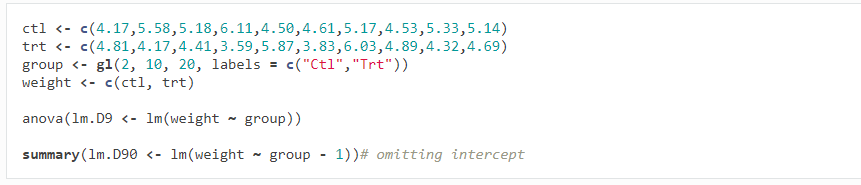

In [14]:
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr
stats = importr('stats')
base = importr('base')
ctl = FloatVector([4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14])
trt = FloatVector([4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69])
group = base.gl(2, 10, 20, labels = ["Ctl","Trt"])
weight = ctl + trt # 相当于c（ctl,trt）

robjects.globalenv['weight']=weight
robjects.globalenv['group']=group
lm_D9 = stats.lm("weight~group")
print(stats.anova(lm_D9))

lm_D90 = stats.lm("weight ~ group - 1")  #omitting the intercept
print(base.summary(lm_D90))

Analysis of Variance Table



Response: weight

          Df Sum Sq Mean Sq F value Pr(>F)

group      1 0.6882 0.68820  1.4191  0.249

Residuals 18 8.7293 0.48496               



Call:

(function (formula, data, subset, weights, na.action, method = "qr", 

    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 

    contrasts = NULL, offset, ...) 

{

    ret.x <- x

    ret.y <- y

    cl <- match.call()

    mf <- match.call(expand.dots = FALSE)

    m <- match(c("formula", "data", "subset", "weights", "na.action", 

        "offset"), names(mf), 0L)

    mf <- mf[c(1L, m)]

    mf$drop.unused.levels <- TRUE

    mf[[1L]] <- quote(stats::model.frame)

    mf <- eval(mf, parent.frame())

    if (method == "model.frame") 

        return(mf)

    else if (method != "qr") 

        warning(gettextf("method = '%s' is not supported. Using 'qr'", 

            method), domain = NA)

    mt <- attr(mf, "terms")

    y <- model.response(mf, "numeric")

    w <- as.vector(m

# principal component analysis
the R conde is as follow:
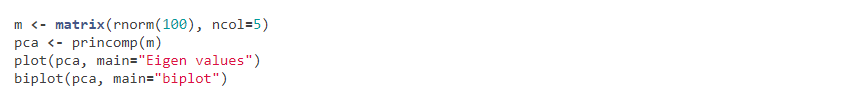

In [1]:

base     = importr('base')
stats    = importr('stats')
graphics = importr('graphics')

m = base.matrix(stats.rnorm(100), ncol = 5)
pca = stats.princomp(m)
graphics.plot(pca, main = "Eigen values")
stats.biplot(pca, main = "biplot")

rpy2.rinterface.NULL

In [2]:
# From rpy2 to numpy:
from rpy2.robjects.packages import importr, data
import numpy

datasets = importr('datasets')
ostatus = data(datasets).fetch('occupationalStatus')['occupationalStatus']
ostatus_np = numpy.array(ostatus) # 修改ostatus_npnc的值，ostatus.rx不会随着改变,即提供了一个copy
ostatus_npnc = numpy.asarray(ostatus) # 修改ostatus_npnc的值，ostatus.rx随着改变，即提供了一个view

In [3]:
print(ostatus)
print(ostatus_np)

      destination

origin   1   2   3   4   5   6   7   8

     1  50  19  26   8   7  11   6   2

     2  16  40  34  18  11  20   8   3

     3  12  35  65  66  35  88  23  21

     4  11  20  58 110  40 183  64  32

     5   2   8  12  23  25  46  28  12

     6  12  28 102 162  90 554 230 177

     7   0   6  19  40  21 158 143  71

     8   0   3  14  32  15 126  91 106

[[ 50  19  26   8   7  11   6   2]
 [ 16  40  34  18  11  20   8   3]
 [ 12  35  65  66  35  88  23  21]
 [ 11  20  58 110  40 183  64  32]
 [  2   8  12  23  25  46  28  12]
 [ 12  28 102 162  90 554 230 177]
 [  0   6  19  40  21 158 143  71]
 [  0   3  14  32  15 126  91 106]]


In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
%%R
attach(iris)
m = lm(Sepal.Length~Sepal.Width)
res = summary(m)
res$coefficients

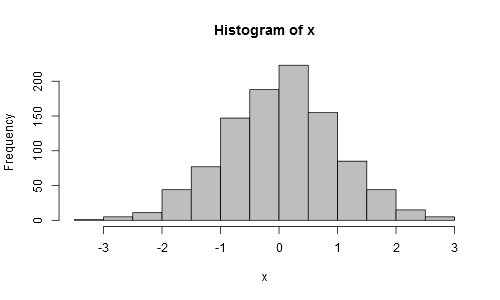

In [7]:
%%R -w 500 -h 300 
# 画图
x = rnorm(1000)
hist(x,c='gray')

In [11]:
%%R -o x,y         
x = rnorm(100)       #R 与 python交互   
y = rnorm(100)

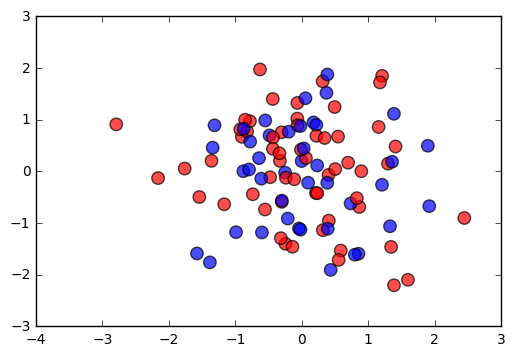

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
z = np.random.choice(['r','b'], size=100, replace=True)
plt.show(plt.scatter(x,y,s=80,c=z ,alpha=0.7))

In [15]:
import pandas as pd
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
df.head()

,x,y,z
0,0.314831,1.744135,r
1,-1.313397,0.892410,b
2,0.434950,-1.905410,b
3,-2.792496,0.911204,r
4,1.344456,-1.460902,r


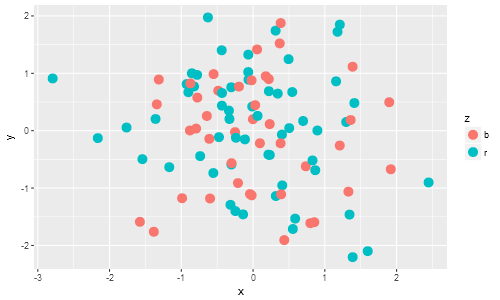

In [19]:
%%R -i df -w 500 -h 300 
library(ggplot2)
p = ggplot(df,aes(x = x, y = y, color = z)) + geom_point(size=4)
print(p)